In [1]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
import pandas as pd

# Load the dataset
file_path = 'bank-additional-full.csv'
data = pd.read_csv(file_path, sep=';')  # Assuming the data is separated by semicolons

# Display the first few rows of the dataset to understand its structure
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Check for missing values and summarize data types
missing_values = data.isnull().sum()
data_types = data.dtypes

missing_values_summary = pd.DataFrame({'Missing Values': missing_values, 'Data Type': data_types})

missing_values_summary

,Missing Values,Data Type
age,0,int64
job,0,object
marital,0,object
education,0,object
default,0,object
housing,0,object
loan,0,object
contact,0,object
month,0,object
day_of_week,0,object


In [4]:
# Check for missing values
missing_values = data.isnull().sum()

# Encoding categorical variables using get_dummies for simplicity
# This approach is suitable for initial exploration and clustering
data_encoded = pd.get_dummies(data.drop('y', axis=1))  # Drop target variable for clustering

# Add the target variable back as a binary variable
data_encoded['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Normalize numerical variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])

missing_values, data_encoded.head()


# Retry the preprocessing steps

# Check for missing values again to ensure stability
missing_values_retry = data.isnull().sum()

# Since encoding and normalization were not completed, let's perform these steps again

# Encoding categorical variables
data_encoded_retry = pd.get_dummies(data.drop('y', axis=1))  # Exclude target variable for clustering

# Convert target variable to binary format again
data_encoded_retry['y'] = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

# Normalize numerical variables
# Initialize the StandardScaler again
scaler_retry = StandardScaler()
numerical_columns_retry = data.select_dtypes(include=['int64', 'float64']).columns
data_encoded_retry[numerical_columns_retry] = scaler_retry.fit_transform(data_encoded_retry[numerical_columns_retry])

missing_values_retry, data_encoded_retry.head()


(age               0
 job               0
 marital           0
 education         0
 default           0
 housing           0
 loan              0
 contact           0
 month             0
 day_of_week       0
 duration          0
 campaign          0
 pdays             0
 previous          0
 poutcome          0
 emp.var.rate      0
 cons.price.idx    0
 cons.conf.idx     0
 euribor3m         0
 nr.employed       0
 y                 0
 dtype: int64,
         age  duration  campaign     pdays  previous  emp.var.rate  \
 0  1.533034  0.010471 -0.565922  0.195414 -0.349494      0.648092   
 1  1.628993 -0.421501 -0.565922  0.195414 -0.349494      0.648092   
 2 -0.290186 -0.124520 -0.565922  0.195414 -0.349494      0.648092   
 3 -0.002309 -0.413787 -0.565922  0.195414 -0.349494      0.648092   
 4  1.533034  0.187888 -0.565922  0.195414 -0.349494      0.648092   
 
    cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_sep  \
 0        0.722722       0.886447    0.71246 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


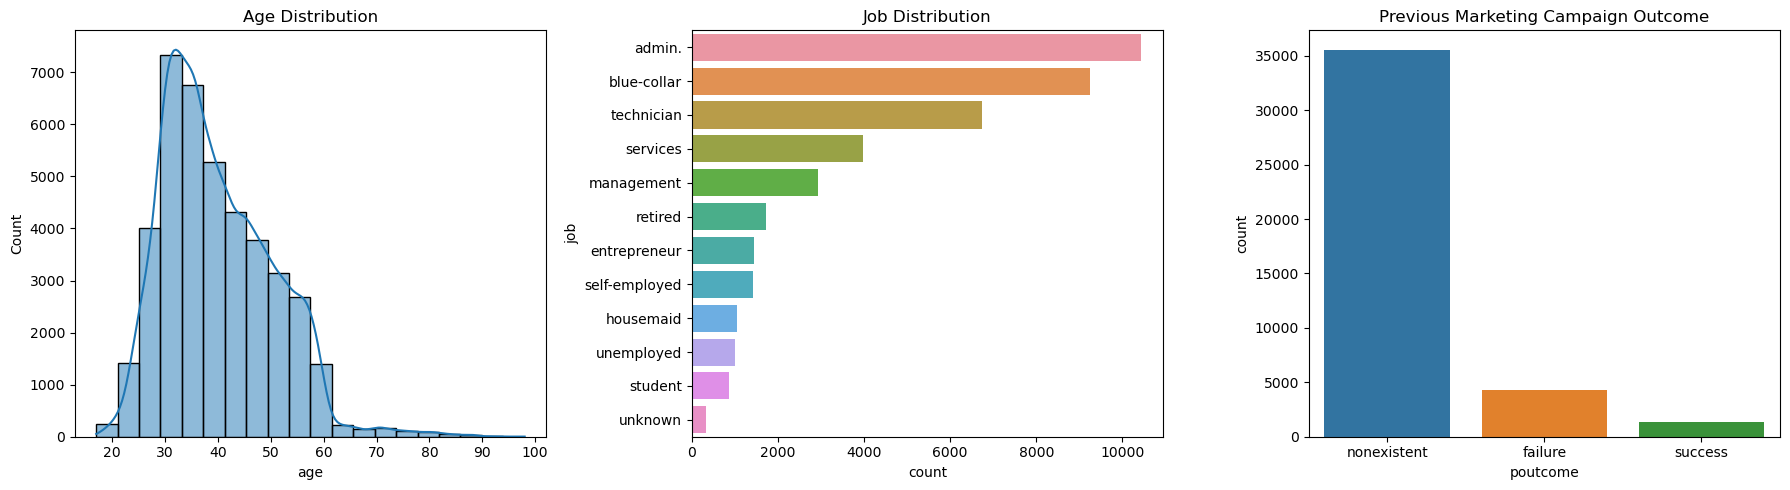

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(18, 5))

# Plot distribution of age
plt.subplot(1, 3, 1)
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Age Distribution')

# Plot distribution of jobs
plt.subplot(1, 3, 2)
sns.countplot(y=data['job'], order = data['job'].value_counts().index)
plt.title('Job Distribution')

# Plot outcome of the previous marketing campaign
plt.subplot(1, 3, 3)
sns.countplot(x=data['poutcome'])
plt.title('Previous Marketing Campaign Outcome')

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


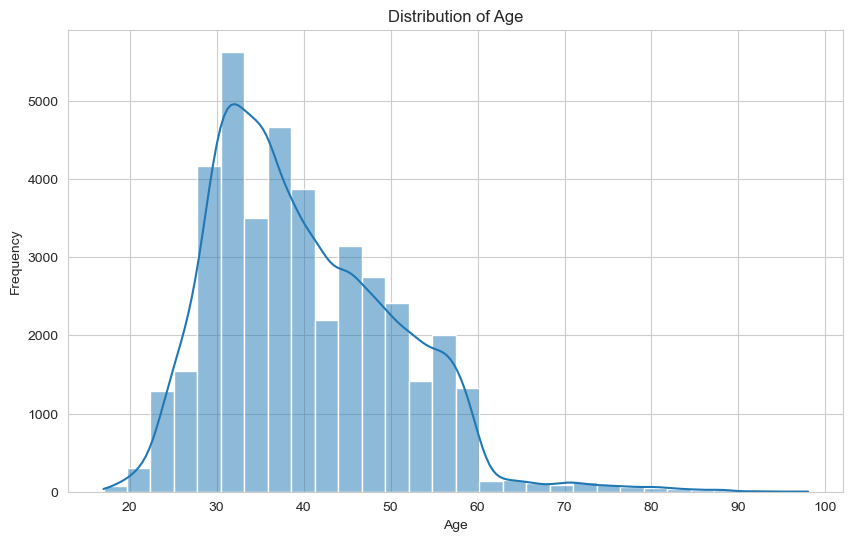

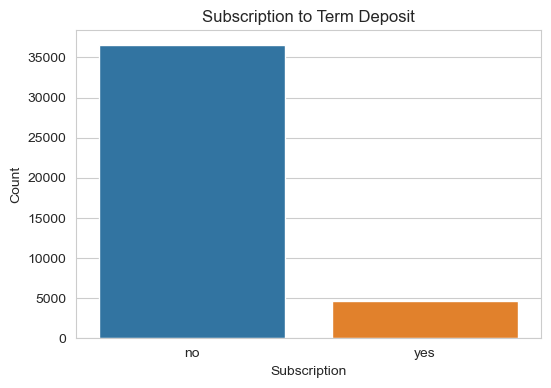

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Distribution of the 'age' variable
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of the response variable 'y'
plt.figure(figsize=(6, 4))
sns.countplot(x=data['y'])
plt.title('Subscription to Term Deposit')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.show()


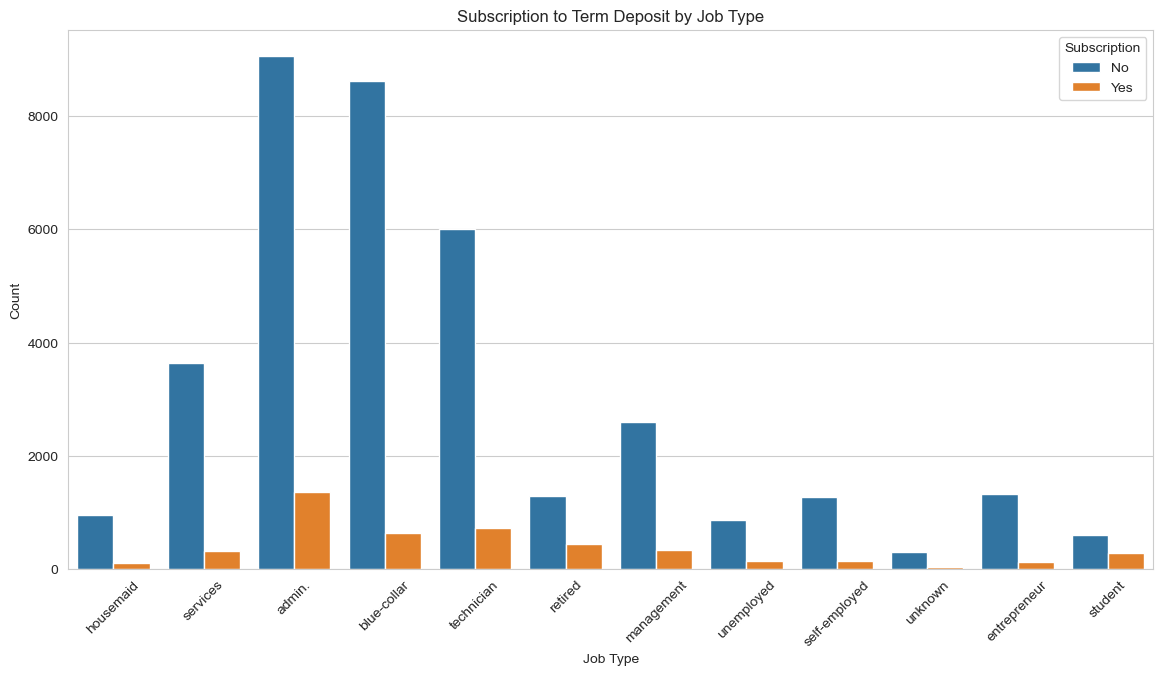

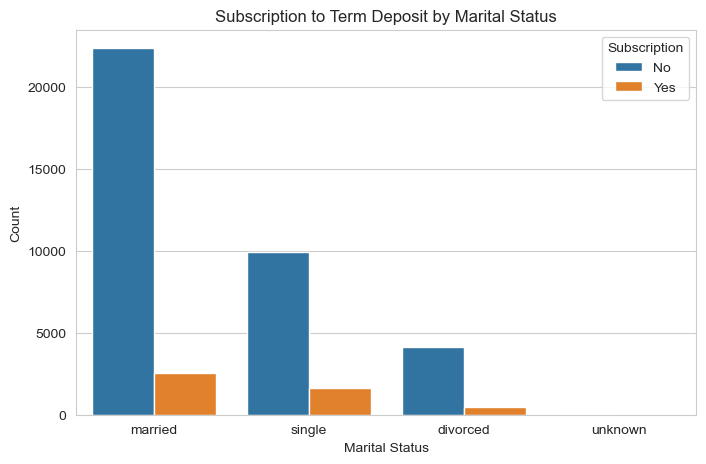

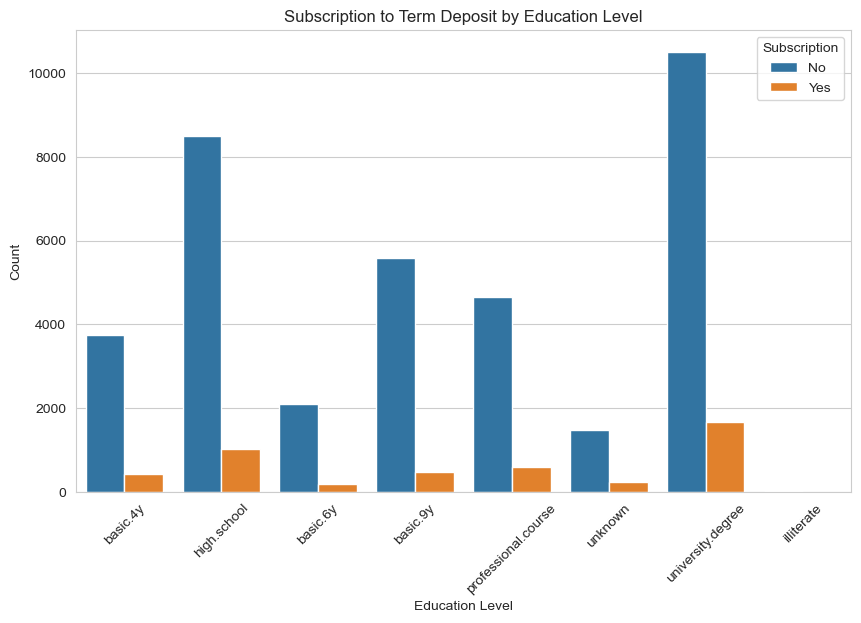

In [7]:
# Visualization of subscription outcome by job type
plt.figure(figsize=(14, 7))
sns.countplot(x='job', hue='y', data=data)
plt.title('Subscription to Term Deposit by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.show()

# Visualization of subscription outcome by marital status
plt.figure(figsize=(8, 5))
sns.countplot(x='marital', hue='y', data=data)
plt.title('Subscription to Term Deposit by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.show()

# Visualization of subscription outcome by education level
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='y', data=data)
plt.title('Subscription to Term Deposit by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.show()


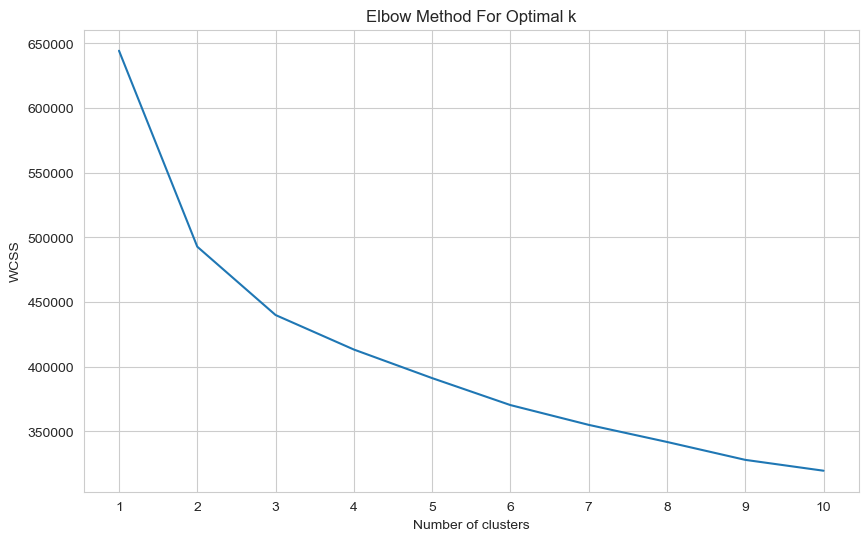

In [8]:
from sklearn.cluster import KMeans

# Prepare the dataset for clustering (excluding the target variable 'y')
X = data_encoded.drop('y', axis=1)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph to observe the 'Elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [9]:
# Apply K-Means clustering to the full dataset with k=4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)

# Add the cluster labels to the original data
data['cluster'] = kmeans.labels_

# Display the first few rows of the dataframe with the cluster labels
data.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,cluster
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,3


In [10]:

# Calculate the mean for numerical attributes for each cluster
cluster_characteristics_num = data.groupby('cluster')[numerical_columns].mean()

# Calculate the mode for categorical attributes for each cluster
# For large datasets, this operation might be computationally expensive. Let's try it and if it doesn't work, we'll use a sample.
try:
    cluster_characteristics_cat = data.groupby('cluster')[data.columns.difference(numerical_columns)].agg(lambda x: x.mode()[0])
except Exception as e:
    # If the operation is too expensive, use a sample for mode calculation
    print(f"An exception occurred: {e}. Trying on a sample instead.")
    cluster_characteristics_cat_sample = data.sample(frac=0.1, random_state=0).groupby('cluster')[data.columns.difference(numerical_columns)].agg(lambda x: x.mode()[0])

# Combine numerical and categorical characteristics for clusters
cluster_characteristics = pd.concat([cluster_characteristics_num, cluster_characteristics_cat], axis=1)
cluster_characteristics


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week,default,education,housing,job,loan,marital,month,poutcome,y
cluster,,,,,,,,,,,,,,,,,,,,,
0,40.176944,250.897847,2.705000,999.000000,0.048333,1.025986,93.570787,-40.188208,4.751355,5220.036597,...,thu,no,university.degree,yes,admin.,no,married,jul,nonexistent,no
1,41.911458,322.576172,1.828125,19.590495,1.691406,-2.090560,93.350723,-38.338997,0.983738,5028.680664,...,thu,no,university.degree,yes,admin.,no,married,may,success,yes
2,39.392116,263.713226,2.125677,999.000000,0.319027,-2.026561,92.987097,-43.185515,1.200703,5077.875190,...,mon,no,university.degree,yes,admin.,no,married,may,nonexistent,no
3,40.211348,253.945673,2.904097,999.000000,0.000151,1.216804,94.139911,-38.665902,4.890663,5206.207666,...,fri,no,high.school,no,blue-collar,no,married,may,nonexistent,no


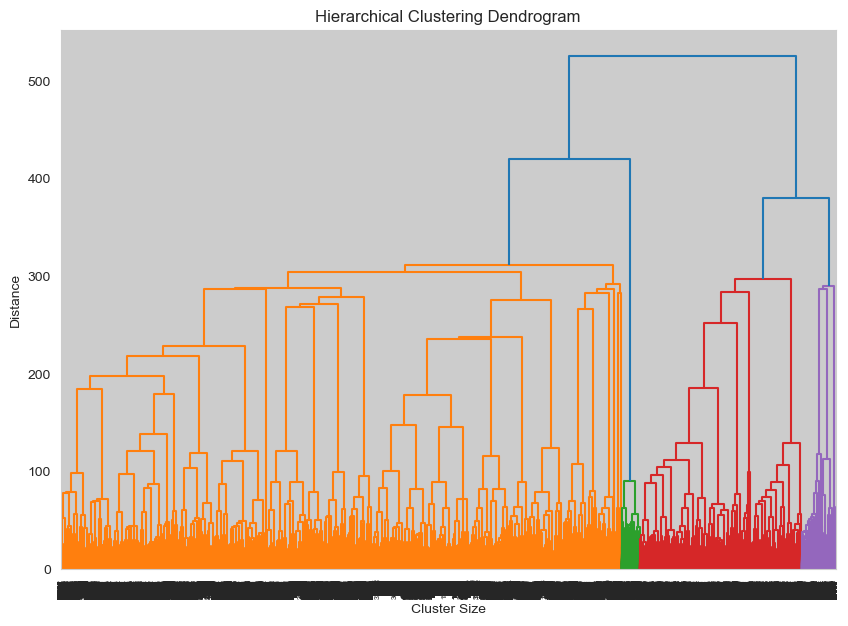

In [11]:
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load your data
# data = pd.read_csv('path_to_your_csv_file.csv')

# Assuming 'data' is your DataFrame and it's already loaded.

# Convert categorical variables to dummy variables
data_encoded = pd.get_dummies(data.drop(['y', 'cluster'], axis=1))

# Standardize the features before hierarchical clustering
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Compute the linkage matrix using Ward's method
linked = linkage(data_scaled, method='ward')

# Plot the hierarchical clustering as a dendrogram.
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [12]:
from scipy.cluster.hierarchy import fcluster

# Define the linkage matrix using the 'ward' method again
linked = linkage(data_scaled, method='ward')

# Choose a maximum distance to define the number of clusters
# This distance will be based on the dendrogram
max_distance = 100  # You may need to adjust this based on your dendrogram

# Retrieve the clusters, given the linkage matrix and the max distance
# The 'criterion' parameter can be set to 'distance' to use the max distance
clusters = fcluster(linked, max_distance, criterion='distance')

# Add the cluster labels to your original data
data['hierarchical_cluster'] = clusters

# Output the first few entries to verify
print(data[['hierarchical_cluster']].head())


   hierarchical_cluster
0                    21
1                    29
2                    29
3                    26
4                    29


In [13]:
# Calculate the mean for numerical attributes for each hierarchical cluster
hierarchical_cluster_characteristics_num = data.groupby('hierarchical_cluster')[numerical_columns].mean()

# Calculate the mode for categorical attributes for each hierarchical cluster
# For a large dataset, this could be computationally intensive. Consider using a sample if needed.
try:
    hierarchical_cluster_characteristics_cat = data.groupby('hierarchical_cluster')[data.columns.difference(numerical_columns)].agg(lambda x: x.mode()[0])
except Exception as e:
    print(f"An exception occurred: {e}. Trying on a sample instead.")
    hierarchical_cluster_characteristics_cat = data.sample(frac=0.1, random_state=0).groupby('hierarchical_cluster')[data.columns.difference(numerical_columns)].agg(lambda x: x.mode()[0])

# Combine numerical and categorical characteristics for hierarchical clusters
hierarchical_cluster_characteristics = pd.concat([hierarchical_cluster_characteristics_num, hierarchical_cluster_characteristics_cat], axis=1)
hierarchical_cluster_characteristics

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,default,education,hierarchical_cluster,housing,job,loan,marital,month,poutcome,y
hierarchical_cluster,,,,,,,,,,,,,,,,,,,,,
1,47.307692,345.609890,2.159341,748.060440,0.615385,-2.846154,92.715363,-33.708791,0.865319,5031.895604,...,no,university.degree,1,yes,admin.,no,married,dec,nonexistent,no
2,45.527851,287.413793,1.801061,978.045093,0.453581,-2.301857,93.247966,-33.476393,0.829194,4991.765252,...,no,university.degree,2,yes,admin.,no,married,sep,nonexistent,no
3,39.704142,309.952663,1.733728,158.473373,1.573964,-1.902959,93.563615,-34.811834,0.846905,4982.417160,...,no,university.degree,3,yes,student,no,single,sep,success,yes
4,44.661538,313.046154,1.692308,5.615385,1.546154,-2.232308,93.532692,-38.373846,0.872123,4990.135385,...,no,university.degree,4,yes,admin.,no,married,oct,success,yes
5,41.375940,320.023631,1.822771,5.585392,1.553169,-2.074329,93.303137,-39.433083,1.079005,5045.470140,...,no,university.degree,5,yes,admin.,no,married,may,success,yes
6,40.447038,223.014363,1.854578,997.240575,0.980251,-0.245781,93.354835,-42.719569,3.749463,5169.484740,...,no,university.degree,6,yes,admin.,no,married,nov,failure,no
7,39.250000,275.380556,1.947222,996.238889,1.091667,-1.800000,93.110572,-46.440278,1.374442,5094.328889,...,no,high.school,7,yes,blue-collar,no,married,apr,failure,no
8,37.542952,237.243392,2.100220,960.842511,1.169053,-1.944714,92.967019,-44.151487,1.214754,5085.186564,...,no,high.school,8,yes,admin.,no,married,may,failure,no
9,41.285714,268.077922,1.714286,6.181818,1.571429,-1.800000,93.355338,-35.194805,0.674519,5011.048052,...,no,university.degree,9,no,admin.,no,single,mar,success,yes
